### Import data

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

MORTALITY_RATE = pd.read_csv("mortality_rate.csv", delimiter=";")

In [16]:
MORTALITY_RATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           164 non-null    int64  
 1   CCI0          164 non-null    float64
 2   SxFict_FCCI0  164 non-null    float64
 3   EV_CCI0       164 non-null    float64
 4   CCI1          164 non-null    float64
 5   SxFict_FCCI1  164 non-null    float64
 6   EV_CCI1       164 non-null    float64
 7   CCI2          164 non-null    float64
 8   SxFict_FCCI2  164 non-null    float64
 9   EV_CCI2       164 non-null    float64
 10  CCI3          164 non-null    float64
 11  SxFict_FCCI3  164 non-null    float64
 12  EV_CCI3       164 non-null    float64
 13  Gender        164 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.1+ KB


### Cleaning data

In [17]:
ev_columns = ['EV_CCI0', 'EV_CCI1', 'EV_CCI2', 'EV_CCI3']
MORTALITY_RATE_LONG = MORTALITY_RATE.melt(id_vars=['Age', 'Gender'], value_vars=ev_columns,
                  var_name='CCI_Level', value_name='Life_Expectancy')

MORTALITY_RATE_LONG['CCI_Level'] = MORTALITY_RATE_LONG['CCI_Level'].map({
    'EV_CCI0': 'CCI 0 (No comorbidity)',
    'EV_CCI1': 'CCI 1 (Low)',
    'EV_CCI2': 'CCI 2 (Medium)',
    'EV_CCI3': 'CCI 3 (High)'
})

### Comparison of male and female mortality rates

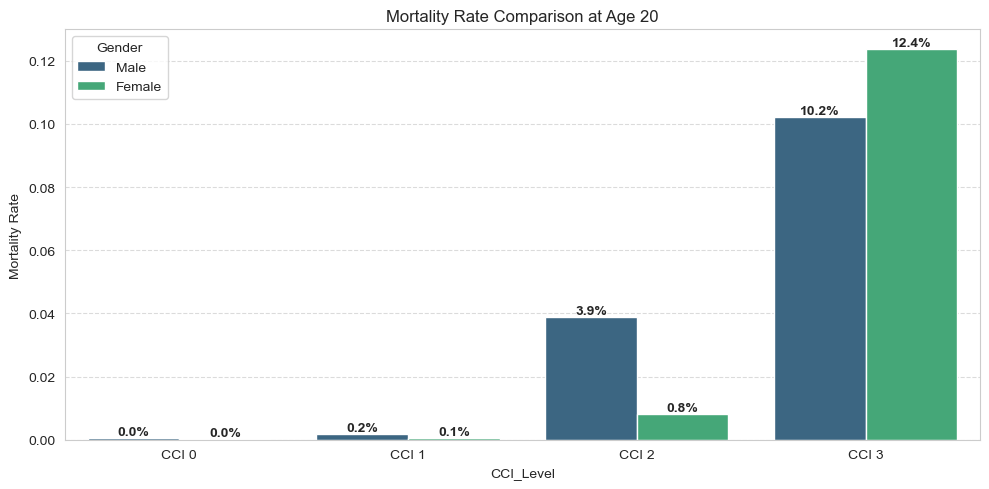

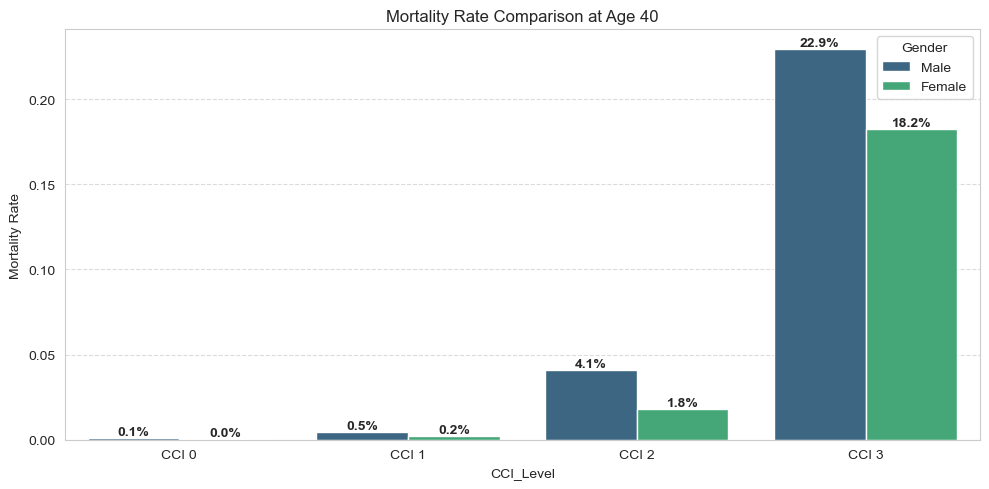

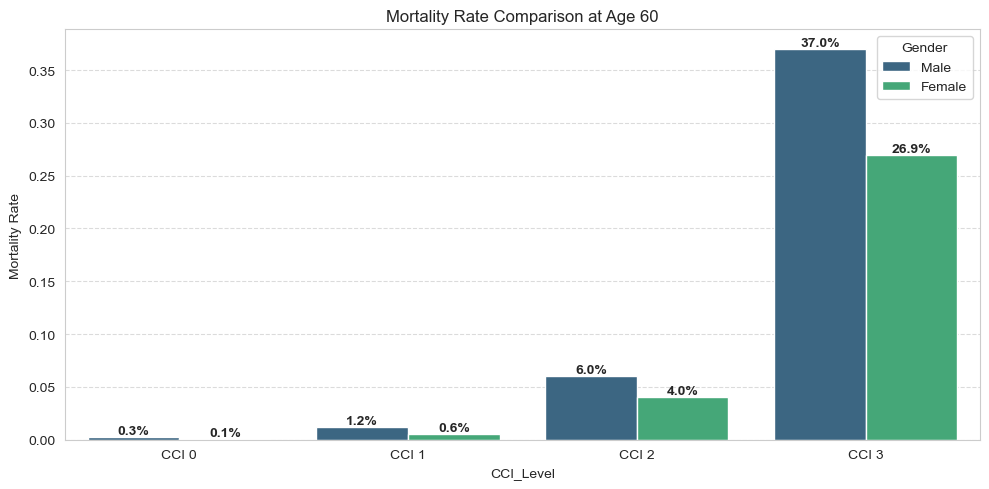

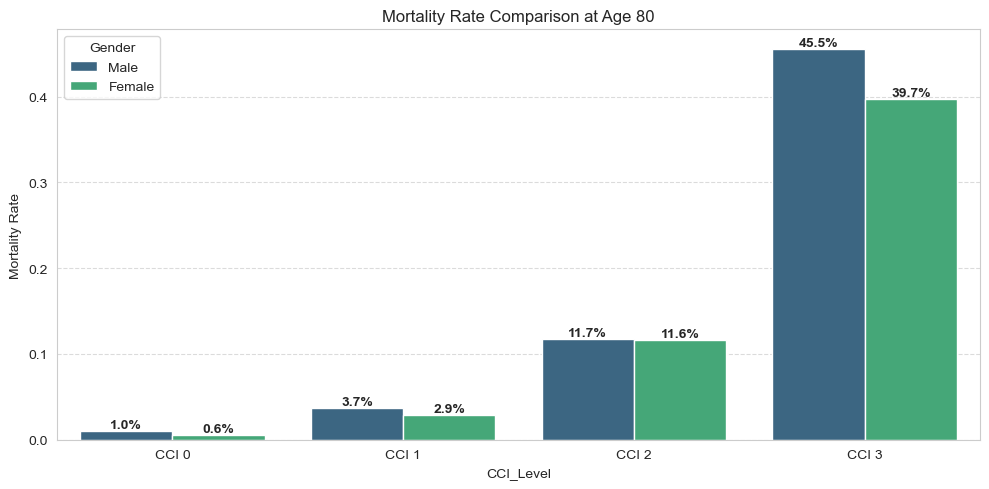

In [18]:
import os
PACKAGE_NAME = 'images'
os.makedirs(PACKAGE_NAME, exist_ok=True)

selected_ages = [20, 40, 60, 80]

for age in selected_ages:
    df_age = MORTALITY_RATE[MORTALITY_RATE['Age'] == age]
    
    mortality_long = pd.DataFrame({
        'Gender': df_age['Gender'],
        'CCI 0': df_age['CCI0'],
        'CCI 1': df_age['CCI1'],
        'CCI 2': df_age['CCI2'],
        'CCI 3': df_age['CCI3'],
    })

    mortality_long = mortality_long.melt(id_vars='Gender', var_name='CCI_Level', value_name='Mortality_Rate')

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=mortality_long, x='CCI_Level', y='Mortality_Rate', hue='Gender', palette='viridis')
    plt.title(f'Mortality Rate Comparison at Age {age}')
    plt.ylabel('Mortality Rate')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1%}',
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{PACKAGE_NAME}/mortality_rate_comparison_at_age_{age}.png', dpi=300, bbox_inches='tight')
    plt.show()

### Visualize Life Expectancy Degradation by CCI Level

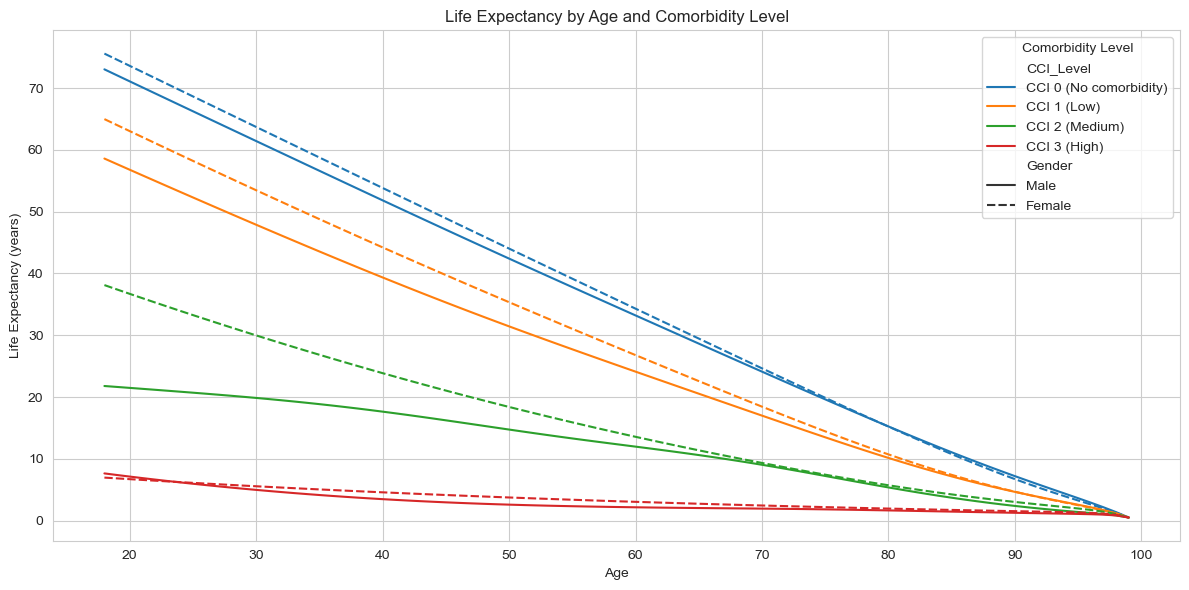

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=MORTALITY_RATE_LONG, x='Age', y='Life_Expectancy',
             hue='CCI_Level', style='Gender', markers=False)
plt.title('Life Expectancy by Age and Comorbidity Level')
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Age')
plt.legend(title='Comorbidity Level')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{PACKAGE_NAME}/life_expectancy_by_age_and_comorbidity_level.png', dpi=300, bbox_inches='tight')
plt.show()

### Survival Profiles for Selected Ages and CCI Levels

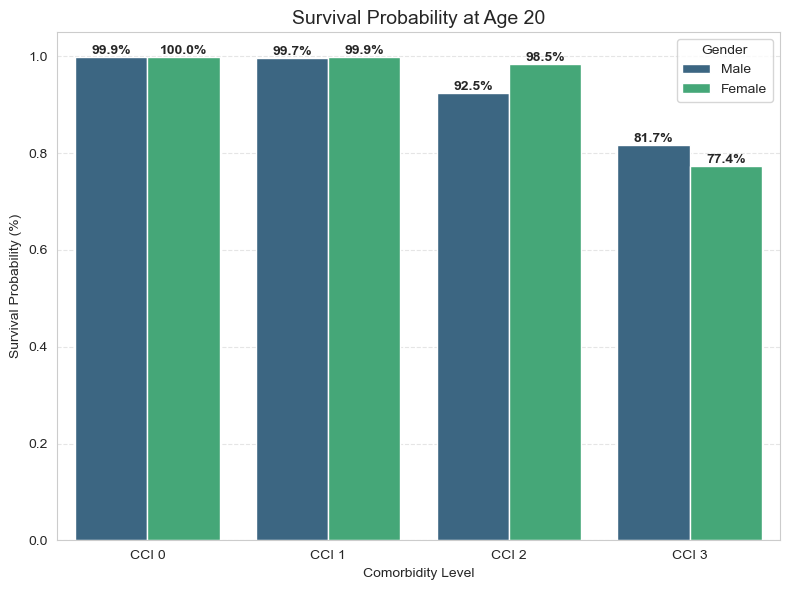

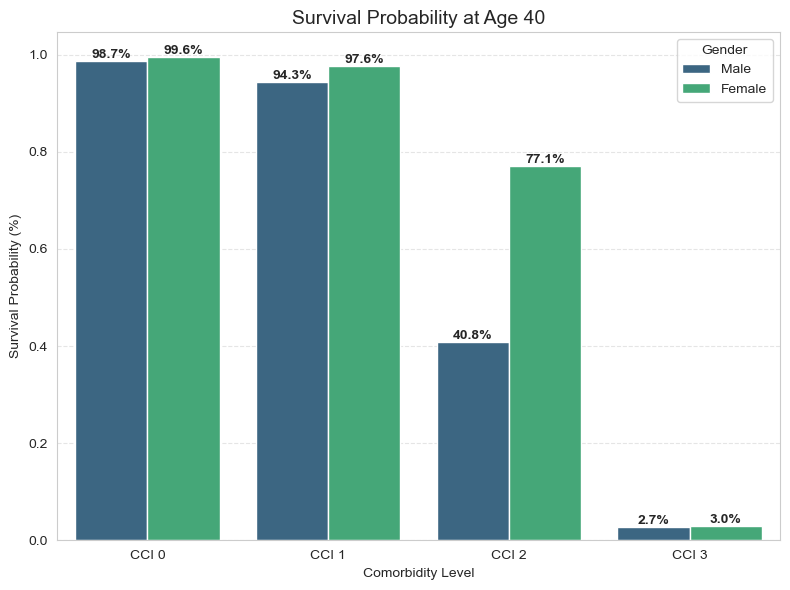

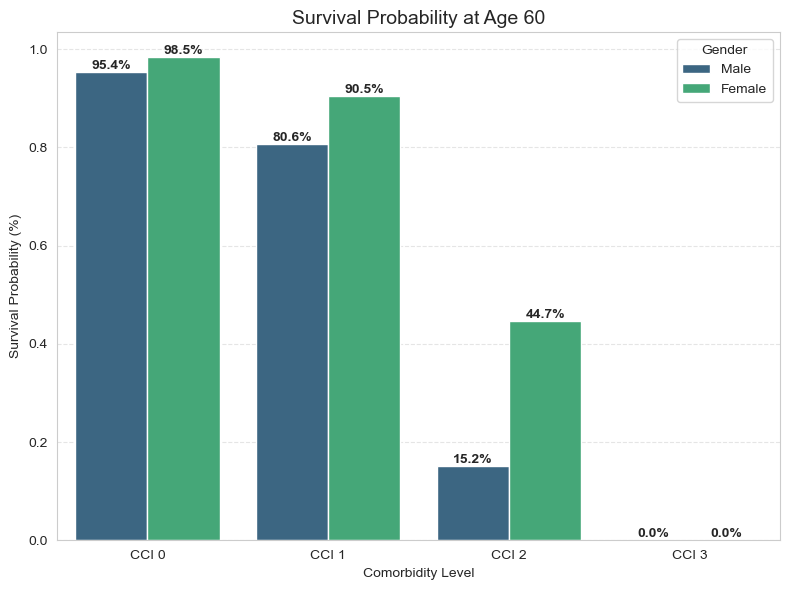

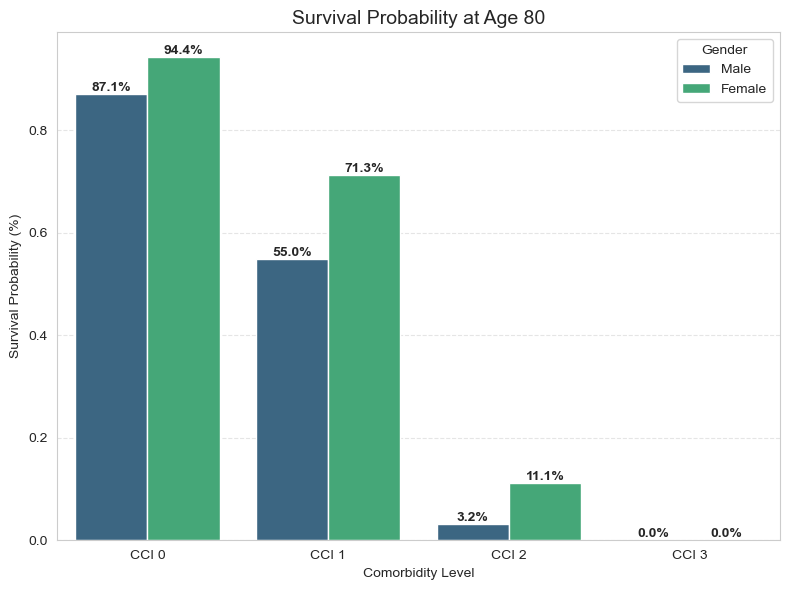

In [20]:
selected_ages = [20, 40, 60, 80]

for age in selected_ages:
    df_age = MORTALITY_RATE[MORTALITY_RATE['Age'] == age]
    
    df_age_long = df_age[['Gender', 'SxFict_FCCI0', 'SxFict_FCCI1', 'SxFict_FCCI2', 'SxFict_FCCI3']].melt(
        id_vars='Gender', 
        var_name='CCI_Level', 
        value_name='Survival_Probability'
    )
    
    df_age_long['Survival_Probability'] = df_age_long['Survival_Probability'] / 100000
    
    df_age_long['CCI_Level'] = df_age_long['CCI_Level'].replace({
        'SxFict_FCCI0': 'CCI 0',
        'SxFict_FCCI1': 'CCI 1',
        'SxFict_FCCI2': 'CCI 2',
        'SxFict_FCCI3': 'CCI 3',
    })

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df_age_long, x='CCI_Level', y='Survival_Probability', hue='Gender', palette='viridis')
    
    plt.title(f'Survival Probability at Age {age}', fontsize=14)
    plt.xlabel('Comorbidity Level')
    plt.ylabel('Survival Probability (%)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1%}',
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    
    plt.savefig(f'{PACKAGE_NAME}/survival_probability_for_age_{age}.png', dpi=300, bbox_inches='tight')
    plt.show()

###  Simulate Life Expectancy Gains by Reducing CCI

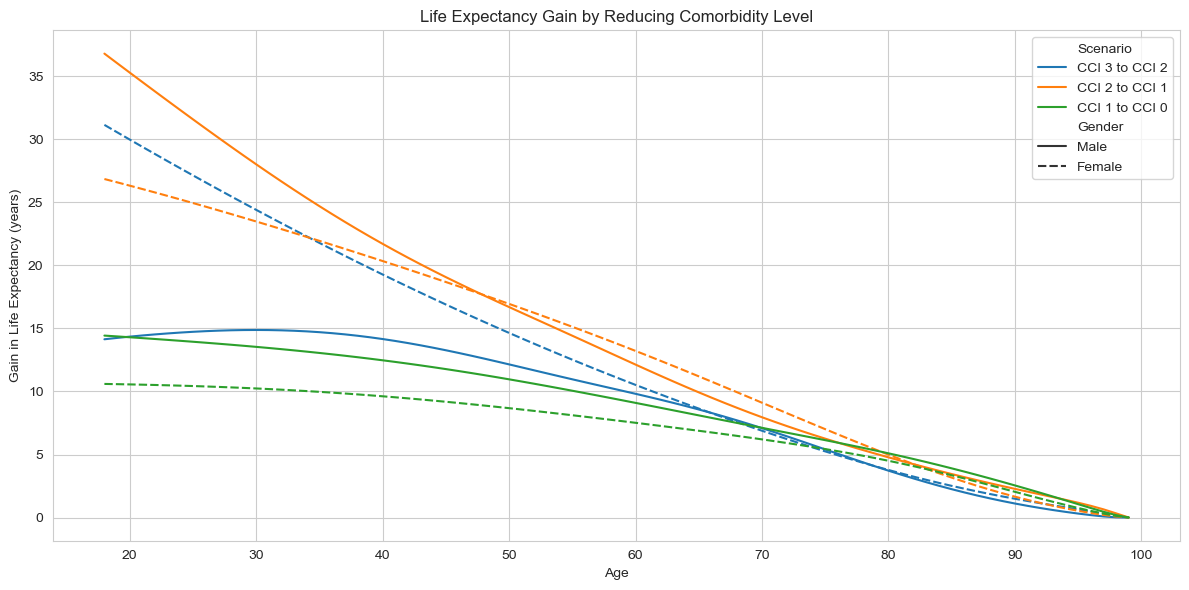

In [21]:
MORTALITY_RATE['Gain_from_CCI3_to_CCI2'] = MORTALITY_RATE['EV_CCI2'] - MORTALITY_RATE['EV_CCI3']
MORTALITY_RATE['Gain_from_CCI2_to_CCI1'] = MORTALITY_RATE['EV_CCI1'] - MORTALITY_RATE['EV_CCI2']
MORTALITY_RATE['Gain_from_CCI1_to_CCI0'] = MORTALITY_RATE['EV_CCI0'] - MORTALITY_RATE['EV_CCI1']

gain_columns = ['Gain_from_CCI3_to_CCI2', 'Gain_from_CCI2_to_CCI1', 'Gain_from_CCI1_to_CCI0']
gain_long = MORTALITY_RATE.melt(id_vars=['Age', 'Gender'], value_vars=gain_columns,
                    var_name='Scenario', value_name='Life_Expectancy_Gain')

gain_long['Scenario'] = gain_long['Scenario'].map({
    'Gain_from_CCI3_to_CCI2': 'CCI 3 to CCI 2',
    'Gain_from_CCI2_to_CCI1': 'CCI 2 to CCI 1',
    'Gain_from_CCI1_to_CCI0': 'CCI 1 to CCI 0'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=gain_long, x='Age', y='Life_Expectancy_Gain',
             hue='Scenario', style='Gender')
plt.title('Life Expectancy Gain by Reducing Comorbidity Level')
plt.xlabel('Age')
plt.ylabel('Gain in Life Expectancy (years)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{PACKAGE_NAME}/life_expectancy_gain.png', dpi=300, bbox_inches='tight')
plt.show()